# Getting Started

During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such web services, recommender systems have taken more and more place in our lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents matching their preferences).

In a general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, books to read, products to buy or anything depending on industry).

**In this notebook**, We will go through different types of recommender systems.
For each of them, we will present how they work, theory behind each one, and discuss their strength and weaknesses.

So let's go

There are basically three types of of recommender systems:


1.   Demographic Filtering : They offer us generalized recommendation for every user based on a certain feature such as (imdb rating, popularity, genre, budger, or revenue).
The system recommends the same movies to users with similar demographic features. Since each user has a different taste and preferences, this approach is too simple.

In a nutshell: Movies that are more popular or have high imdb rating have higher probability of being liked by and recommended to the average user.

---

2.  Content Based Filtering: They suggest similar items based on the items metadata such as description, genres, or leading actors for movies, to make recommendations

In a nutshell: If a person liked a certain item, he/she will like items similar to it.

---

3. Collabrative Filtering: This system matches people with similar interests and provides recommendations based on this matching. Collabrative Filters do not require items metadata.


In a nutshell: We have person-1 and person-2.
If person-1 likes movies A, B, C, and D, person-2 likes movies C, and D, Then the system will recommend movies A, and B to person-2.

In [ ]:
# Lets start by mounting our drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import necessary libararies
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
# sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity
from ast import literal_eval

%matplotlib inline
sns.set_style('whitegrid')

# Check current working directory
print(os.getcwd())
# Change directory to where our dataset is located
data_path = '/content/drive/MyDrive/Colab Notebooks/Movies Recommendation' 
os.chdir(data_path)
# List all files in directory
for dirname, _, filenames in os.walk(data_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content
/content/drive/MyDrive/Colab Notebooks/Movies Recommendation/tmdb_5000_credits.csv
/content/drive/MyDrive/Colab Notebooks/Movies Recommendation/tmdb_5000_movies.csv
/content/drive/MyDrive/Colab Notebooks/Movies Recommendation/movies_metadata.csv
/content/drive/MyDrive/Colab Notebooks/Movies Recommendation/credits.csv


## Working with TMDB5000 Dataset

**About the data**

We have two datasets : movies and credits.

The movies datasets contains:


*   budget - the cost of making the movie
*   genres - the genre of the movie, Action, SciFi, Fantasy
*   homepage - a link to movie's homepage
*   id - movie_id as in the second dataset
*   keywords - tags related to the movie
*   original_language - the language in which a movie was made
*   original_title - the title of the movie before translation or adapted
*   overview - A short description of the movie
*   popularity - A number that represents movie popularity
*   production_companies - The production house of the movie
*   production_countries - The country the movie was produced in
*   release_date - date of movie release
*   revenue - the worldwide revenue generated by movie
*   runtime - the running time of movie in minutes
*   status - 'Released' or 'Rumored'
*   tagline - movie's tagline
*   title - movie's title
*   vote_average - average ratings that movie received
*   vote_count- the count of votes received


The credits dataset contains:


*   movie_id - a unique key for each movie
*   title - movie's title
*   cast - the name of lead and secondary actors
*   crew - the name of director, editor, composer, writer, etc.


In [ ]:
# Load our data
# Put your own paths of files
meta = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Movies Recommendation/tmdb_5000_movies.csv') 
credits = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Movies Recommendation/tmdb_5000_credits.csv')

In [ ]:
# view head of our data
display(meta.head(1))
print('-' * 80)
print(meta.shape)
print()
display(credits.head(1))
print('-' * 80)
print(credits.shape)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


--------------------------------------------------------------------------------
(4803, 20)



,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


--------------------------------------------------------------------------------
(4803, 4)


In [ ]:
# Columns and data types
print(meta.info())
print('-' * 80)
print()
print(credits.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [ ]:
# check for null values
print(meta.isna().sum())
print('-' * 80)
print(credits.isna().sum())
print('-' * 80)

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64
--------------------------------------------------------------------------------
movie_id    0
title       0
cast        0
crew        0
dtype: int64
--------------------------------------------------------------------------------


We will ignore some of the null values since we won't be using the entire movies metadata for our analysis. Lets merge the credits and metadata in one dataframe on **id**.

In [ ]:
# first, rename the column movie_id to id in credits dataframe
credits.rename(columns = {'movie_id':'id', 'title': 'title', 'cast':'cast', 'crew': 'crew' }, inplace = True)
# now, merge
data = meta.merge(credits, on = 'id')
print("Full data shape: ", data.shape)

Full data shape:  (4803, 23)


In [ ]:
# Check for duplicates Before starting our process.
print("Number of duplicate records: ", data.duplicated().sum())
print("Full data shape: ", data.shape)

Number of duplicate records:  0
Full data shape:  (4803, 23)


## Demographic Filtering


### 1. Rank-Based System


This system uses the weighted rating of each movie, and the higher-scoring movies have higher probabilities of being recommended to the average user.

Before getting started with this type of system, we need to consider one thing:

If we use the 'average_rating' column for rating our movies, this won't be fair because a movie with 8.5 average rating and only 3 votes will be considered better than a 8.0 movie with 50 votes, So we'll use IMDB's weighted rating formula to evaluate a new scoring metric.


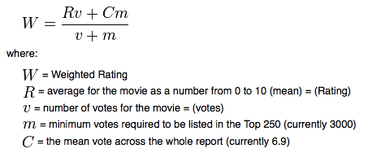

We already have v (vote_count) and R (vote_average), so We'll create a helper function to calculate C and m for the idmb formula.

In [ ]:
def calculate_v_m(df, show_vals = False):
    # The mean rating will be on a scale of 10
    C = df['vote_average'].mean()
    
    # We're taking 90th percentile since we want movies which have got votes
    # more than 90% to be in the list. Movies with higher number of votes
    # should be included.
    m = np.percentile(df['vote_count'], 90)

    if show_vals:
        print("Mean vote across whole dataset: {:.2f}".format(c))
        print("Minimum votes required to be listed in Top 250: {:.2f}".format(m))
    else:
        pass
        
    return C, m

In [ ]:
# Testing our function
c, m = calculate_v_m(data)
print(c, m)

6.092171559442011 1838.4000000000015


Now, we want to calculate the weighted rating using the IMDB Formula and return it as a column by the name of weighted_rating in our dataframe.

For this I created a function weighted_rating.

In [ ]:
def weighted_rating(df, c = c, m = m):
    v = df['vote_count']
    R = df['vote_average']
    # Calculate W using imdb formula
    return (v / (v + m) * R) + (m / (v + m) * c)

Filter for movies that satisfy our conditions,
We'll create a helper function for this part since it will used numerous times in our notebook.

In [ ]:
def get_movies(data):
    movies_list = data.copy().loc[data['vote_count'] >= m]
    return movies_list

Now, comes the part where we sort our movies according to their score to understand which movies ranks higher. Lets see top 20 movies.

In [ ]:
def get_ranked_recommendations(df, n_movies = 10):
    # First, calculate c, m from the imdb formula
    c, m = calculate_v_m(data)
    #Second, Get the list of movies that are most rated.
    movies_list = get_movies(data)
    # Defining our new feature 'weighted_rating' and calculating its value
    movies_list['weighted_rating'] = movies_list.apply(weighted_rating, axis =1)
    # Sort movies based on score
    movies_list_sorted = movies_list.sort_values('weighted_rating', ascending = False)
    # Return the top n recommended movies
    print("The top {} movies based on Rank :".format(n_movies))
    display(movies_list_sorted[['original_title', 'vote_count', 'vote_average', 'weighted_rating']].head(n_movies))

In [ ]:
# Test our ranking system
get_ranked_recommendations(data)

The top 10 movies based on Rank :


,original_title,vote_count,vote_average,weighted_rating
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


Let's plot a graph of most popular movies and highest budget movies. I will use the 'popularity' and 'budget' columns from our **data** dataframe.

### 2. Popularity-Based System

Text(0.5, 1.0, 'Top 10 popular movies')

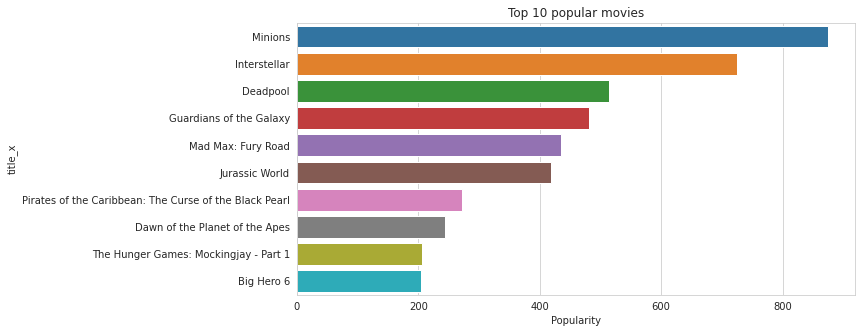

In [ ]:
# Most popular movies
popular = data.sort_values('popularity', ascending = False)
# Create a new figure
fig = plt.figure(figsize = (10, 5))
sns.barplot(x = popular['popularity'].head(10), y= popular['title_x'].head(10))
plt.xlabel('Popularity')
plt.title('Top 10 popular movies')

Text(0.5, 1.0, 'Top 10 expensive movies')

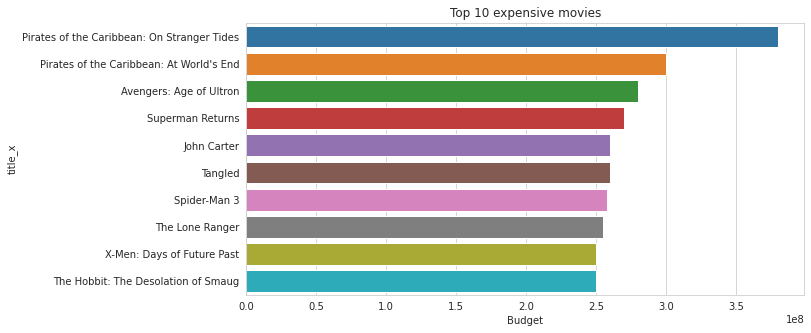

In [ ]:
# High budget movies
costy = data.sort_values('budget', ascending = False)
# Create a new figure
fig = plt.figure(figsize = (10, 5))
sns.barplot(x = costy['budget'].head(10), y= costy['title_x'].head(10))
plt.xlabel('Budget')
plt.title('Top 10 expensive movies')

Now, what if we wanted to recommend movies based on thier weighted_rating and their popularity scores?

### 3. Rank_Popularity Based System


In [ ]:
# First, calculate c, m from the imdb formula
c, m = calculate_v_m(data)
# Second, get the movies list
movies_list = get_movies(data)
# apply weighted rating to our dataframe and store the values in weighted_rating
movies_list['weighted_rating'] = movies_list.apply(weighted_rating, axis = 1)

# Scale our features between 0 and 1
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
movies_scaled = min_max_scaler.fit_transform(movies_list[['weighted_rating', 'popularity']])
movies_norm = pd.DataFrame(movies_scaled, columns = ['weighted_rating', 'popularity'])

#display("Movies normalized: ", movies_norm.head())
#print('-' * 80)

# create the two new columns in movies_list dataframe
movies_list[['norm_weighted_rating', 'norm_popularity']] = movies_norm
# Calculate score based on weighted rating and popularity
movies_list['score'] = movies_list['norm_weighted_rating'] * 0.5 + movies_list['popularity'] * 0.5

Now that we have a new score column that takes into account a movie's weighted average rating and its popularity with a 50/50 split,

we can see what our recommender system will offer us:

In [ ]:
# Sort the movies based on score
movies_scored = movies_list.sort_values(by = 'score', ascending = False)
display(movies_scored[['original_title', 'norm_weighted_rating', 'norm_popularity']].head(10))

,original_title,norm_weighted_rating,norm_popularity
95,Interstellar,0.461405,0.059568
94,Guardians of the Galaxy,0.524302,0.078982
127,Mad Max: Fury Road,0.324195,0.069861
28,Jurassic World,0.398475,0.087752
199,Pirates of the Caribbean: The Curse of the Bla...,0.885651,0.139370
82,Dawn of the Planet of the Apes,0.578470,0.122453
200,The Hunger Games: Mockingjay - Part 1,0.850057,0.120239
88,Big Hero 6,0.362052,0.070147
108,Terminator Genisys,0.543573,0.128946
26,Captain America: Civil War,0.469378,0.038102


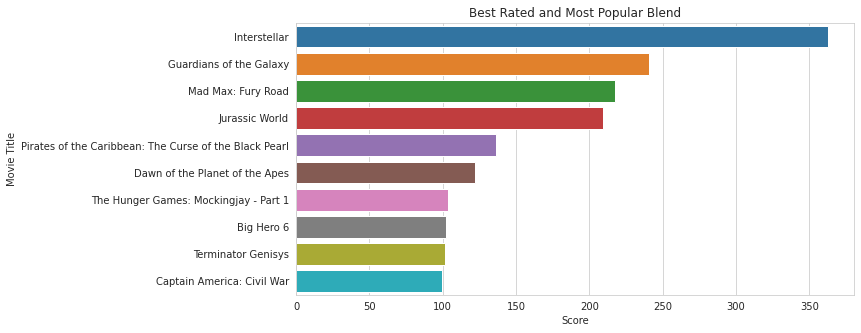

In [ ]:
# Lets visualize our recommendations
# Create a new figure
fig = plt.figure(figsize = (10, 5))
sns.barplot(x = movies_scored['score'].head(10), y= movies_scored['original_title'].head(10), data = movies_scored)
plt.xlabel('Score')
plt.ylabel('Movie Title')
plt.title('Best Rated and Most Popular Blend')
plt.show()

### Limitations of Demographic Filtering

Demographic filtering methods do not consider different tastes and interests across all users, and it also do not use any of the movies metadata to recommend movies, so it's very limited.

Lets take this to the next level by creating our **Content-Based Recommender System**.

## Content-Based Recommender System

In this type of systems, we'll use the movie metadata (overview, crew, cast, keywords, title, duration, etc).

but before diving in, we should discuss a few terms sucha as:

1.   CountVectorizer
2.   TF-IDF Vectorizer
3.   Cosine Similarity


Let's start with the **CountVectorizer()**


CountVectorizer is a method to transform text data into numerical representation.

It counts number of unique words in a text document and returns a **sparse matrix** containing the word frequency in the document.

let's show how it works with an example.

In [ ]:
text = ["Hello my name is Mostafa, this is mostafa's jupyter notebook"]
count_vec = CountVectorizer()
sparse_matrix = count_vec.fit_transform(text)
print(sparse_matrix)
print()

# Convert sparse matrix to dataframe for better presentation
sparse_mat = sparse_matrix.todense()
df = pd.DataFrame(sparse_mat, columns = count_vec.get_feature_names_out())
print(df)

  (0, 0)	1
  (0, 4)	1
  (0, 5)	1
  (0, 1)	2
  (0, 3)	2
  (0, 7)	1
  (0, 2)	1
  (0, 6)	1

   hello  is  jupyter  mostafa  my  name  notebook  this
0      1   2        1        2   1     1         1     1


Secondly, **TfidfVectorizer()**

Word counts with **CountVectorizer()** is a good start, but very basic.

One issue is that some words may appear many times and their large counts is not very meaningful.

The Tfidf negates this by using two metrics and multiplying their scores:


1.   **Term Frequency**: This summarizes how often a given word appears within a document.

2. **Inverse Document Frequency**:  This downscales words that appear a lot across different documents.

Without going into tha math, TF-IDF are word scores that try to highlight words that are more interesting, frequent in one documents but not across documents.



In [ ]:
text = ["This is the first document.", "This document is the second"]

tf_idf = TfidfVectorizer()
sparse_matrix = tf_idf.fit_transform(text)
print(sparse_matrix)
print()

# Convert sparse matrix to dataframe for better presentation
sparse_mat = sparse_matrix.todense()
df = pd.DataFrame(sparse_mat, columns = tf_idf.get_feature_names_out())
print(df)

  (0, 0)	0.40909010368335985
  (0, 1)	0.5749618667993135
  (0, 4)	0.40909010368335985
  (0, 2)	0.40909010368335985
  (0, 5)	0.40909010368335985
  (1, 3)	0.5749618667993135
  (1, 0)	0.40909010368335985
  (1, 4)	0.40909010368335985
  (1, 2)	0.40909010368335985
  (1, 5)	0.40909010368335985

   document     first       is    second      the     this
0   0.40909  0.574962  0.40909  0.000000  0.40909  0.40909
1   0.40909  0.000000  0.40909  0.574962  0.40909  0.40909


Let's start simple, I will use the 'overview column' to recommend movies to the user. This 'overview' column contains movie description.

In [ ]:
# Overview Column
data['overview'].head(10)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
5    The seemingly invincible Spider-Man goes up ag...
6    When the kingdom's most wanted-and most charmi...
7    When Tony Stark tries to jumpstart a dormant p...
8    As Harry begins his sixth year at Hogwarts, he...
9    Fearing the actions of a god-like Super Hero l...
Name: overview, dtype: object

To compute the cosine similarity between movies, you need the word counts in each movie metadata.

The **CountVectorizer** or the **TfidfVectorizer** from scikit learn lets us compute this.


Now, we'll define TF-IDF Vectorizer object which will remove the stop words in english from our corpus. Stop words are words like 'are', 'the' , 'on' etc which do not provide any meaningful information to our data analysis. Also, we will replace the Null values with an empty string.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Define a TF-IDF vectorizer object and remove stop words
tfidf = TfidfVectorizer(stop_words = 'english')

# Replace Nulls with an empty string
data['overview'] = data.overview.fillna('')

# Make the vectorizer matrix by fitting and transforming our data
tfidf_matrix = tfidf.fit_transform(data['overview'])

# Print the output shape of the matrix
print(tfidf_matrix.shape)

# See how many words our vectorizer uses as features
print(len(tfidf.get_feature_names_out()))

# Convert sparse matrix to dataframe if you want to see
# word frequencies
doc_term_matrix = tfidf_matrix.todense()
word_freqs = pd.DataFrame(doc_term_matrix, columns = tfidf.get_feature_names_out())

(4803, 20978)
20978


We see that over 20,000 different words were used to describe the 4800 movies in our dataset.

We first need calculate the cosine similarity matrix.

But how do we calculate it?

Since we have used the sparse matrix returned to us by TF-IDF Vectorizer, calculating the dot product will directly give us the cosine similarity score. 

x.y = ||x||.||y||.cos(θ)

So cos(θ) = (x.y) / (||x|| ||y||)

We will use sklearn's linear_kernel() to calculate the dot product instead of cosine_similarities() since it is faster.



In [ ]:
# Calculating the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
print("Cosine Similarity Matrix Shape: ",cosine_sim.shape)

Cosine Similarity Matrix Shape:  (4803, 4803)


Now, we'll do a reverse mapping of the movie titles and indices of the dataframe which will help identify the index of a movie in our metadata dataframe.

In [ ]:
indices = pd.Series(data.index, index = data['title_x'])
print(indices.head())

title_x
Avatar                                      0
Pirates of the Caribbean: At World's End    1
Spectre                                     2
The Dark Knight Rises                       3
John Carter                                 4
dtype: int64


In [ ]:
## Testing cell ##

# Print similarity scores between 1st movie and rest of movies.
for i in range(6):
    print(cosine_sim[0][i])

print()
# Print similarity scores with movie indices for 1st movie
# (index, similarity)
m1_sim_scores = list(enumerate(cosine_sim[0]))
print(m1_sim_scores[0])

print()
# Similarity score of 1st movie with itself
print(m1_sim_scores[0][1])

print()
# Sort similarity scores list for 1st movie
m1_scores_sorted = sorted(m1_sim_scores, key = lambda x: x[1], reverse = True) # reverse = True for descending order
print(m1_scores_sorted[0])

# Print top 10 similar movies 
# Ignore 1st element as it refers to the movie entered to function
m1_scores_sorted[1:11]

1.0
0.0
0.0
0.0249951158376727
0.0
0.0303525438443129

(0, 1.0)

1.0

(0, 1.0)


[(3604, 0.18681001056212054),
 (2130, 0.17015105119162663),
 (634, 0.13230696630317224),
 (1341, 0.12393264590871879),
 (529, 0.12248959164893028),
 (1610, 0.10469903037615635),
 (311, 0.10091388184065117),
 (847, 0.09799623121705058),
 (775, 0.09447938436890335),
 (2628, 0.09313854469530522)]

Finally, we define a function that we return movie recommendations based on movie title entered by user.

There are the steps will follow:


1.   Get the index of the movie given its title

2.   Get the list of cosine similarity scores for that particular movie. Convert it to a list of tuples where as first element is the index of the movie and the second is its similarity score to a certain movie

3. Sort the list of tuples based on similarity scores

4. Get the top n elements of this list (ignore the first element as it describes a movie cosine similarity to itself)

5. Return the titles corresponding to indices of top n elements



In [ ]:
def get_content_recommendations(title, cosine_sim = cosine_sim, n_movies = 10):
    # Fetch index that matches movie title
    indx = indices[title]

    # Pairwise similarity scores of all movies with movie entered
    # Convert it into a list of tuples, where first element in tuple
    # is movie index, and the second is its similarity score.
    sim_scores = list(enumerate(cosine_sim[indx]))

    # Scoring movies based on similarity scores
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse = True)

    # Scores of the top n similar movies
    sim_scores = sim_scores[1: n_movies + 1]

    # Fetch the movies indices
    movies_indices = [i[0] for i in sim_scores]

    # Return the top n similar movies
    return data['original_title'].iloc[movies_indices]

Now, the user can enter the movie title and get recommendations

In [ ]:
# Test 1
get_content_recommendations('Fight Club')

3619                      UHF
2828                Project X
2585          The Hurt Locker
2344              Raging Bull
2023               The Animal
1414      Blast from the Past
4044               Go for It!
3515             Freaky Deaky
4045    Dancer, Texas Pop. 81
4760    This Is Martin Bonner
Name: original_title, dtype: object

In [ ]:
# Test 2
get_content_recommendations('Avatar')

3604                       Apollo 18
2130                    The American
634                       The Matrix
1341                Obitaemyy Ostrov
529                 Tears of the Sun
1610                           Hanna
311     The Adventures of Pluto Nash
847                         Semi-Pro
775                        Supernova
2628             Blood and Chocolate
Name: original_title, dtype: object

In [ ]:
# Test 3
get_content_recommendations('The Godfather')

2731     The Godfather: Part II
1873                 Blood Ties
867     The Godfather: Part III
3727                Snabba Cash
3623                       Made
3125                     Eulogy
3896                   Sinister
4506            The Maid's Room
3783                        Joe
2244      The Cold Light of Day
Name: original_title, dtype: object

### Data Cleaning

What we did above was by using the 'overview' feature and TF-IDF Vectorizer object to get recommendations. Lets now blend 'genres', 'crew', and 'keywords' in.

This will help increase the accuracy of our recommendation as these features are better metadata than 'overview'.

The first step is to read the stringfield attribute features into their respective python objects.

In [ ]:
pd.set_option('display.max_colwidth', -1)
# Take a look at our features
data[['genres', 'crew', 'keywords']][:1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


genres  \
0  [{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

As you can see, the crew feature data is messy to say the least, if we were to clean this and parse it normally, it would take quite the effort.

This is were **ast.literal_eval function** steps in.

The **ast.literal_eval** function is a helper method that can evaluate strings containing python values from unknown sources without us having to parse the values.

Best way to understand it is to see it in action.

In [ ]:
dictionary = literal_eval("{'a': 1, 'b': 2}")
print (type(dictionary))
print (dictionary)

<class 'dict'>
{'a': 1, 'b': 2}


In [ ]:
# Apply literal_eval to our features
features = ['cast', 'crew', 'genres', 'keywords']
for feature in features:
    data[feature] = data[feature].apply(literal_eval)

Extract the director name from the crew feature

In [ ]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

Now, we define a function to get the top 3 elements from our list.

In [ ]:
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        # Check if more than 3 elements exist. If yes, return only first three.
        # If no, return entire list
        if len(names) > 3:
            names = names[:3]
        return names
        
        # Return empty list in case of missing/malformed data
    return []

In [ ]:
# Now, get director, cast, genres, and keyword attributes
data['director'] = data['crew'].apply(get_director)

features = ['cast', 'crew','keywords', 'genres']
for feature in features:
    data[feature] = data[feature].apply(get_list)

Preview our new dataframe




In [ ]:
data[['original_title', 'cast', 'director', 'keywords', 'genres']].head()

,original_title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"
3,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman]",Christopher Nolan,"[dc comics, crime fighter, terrorist]","[Action, Crime, Drama]"
4,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton]",Andrew Stanton,"[based on novel, mars, medallion]","[Action, Adventure, Science Fiction]"


We need to do some further data cleaning,

strip all spaces from names and keywords attributes and convert them to lower case .


In [ ]:
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(' ', '')) for i in x]
    else:
        # Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(' ', ''))
        else:
            return ''

Apply our function

In [ ]:
features = ['cast', 'director', 'keywords', 'genres']

for feature in features:
    data[feature] = data[feature].apply(clean_data)

Preview our dataframe after cleaning:


In [ ]:
data.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew,director
0,237000000,"[action, adventure, fantasy]",http://www.avatarmovie.com/,19995,"[cultureclash, future, spacewar]",en,Avatar,"In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289}, {""name"": ""Twentieth Century Fox Film Corporation"", ""id"": 306}, {""name"": ""Dune Entertainment"", ""id"": 444}, {""name"": ""Lightstorm Entertainment"", ""id"": 574}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[samworthington, zoesaldana, sigourneyweaver]","[Stephen E. Rivkin, Rick Carter, Christopher Boyes]",jamescameron


Finally, we create a soup object that contains the cleaned features: cast, keywords, director, genres values to. This function will be given to our vectorizer

In [ ]:
def create_soup(df):
    return ' '.join(df['keywords']) + ' ' + ' '.join(df['cast']) +  ' ' + df['director'] + ' ' + ' '.join(df['genres'])

In [ ]:
data['soup'] = data.apply(create_soup, axis = 1)

Now, we do the same steps as before but instead of using TF-IDF, we use Count_Vectorizer.

This is because we don't want to down-weight the presence of an actor/director if he/she has acted or directed in relatively more movies. It does not make much sense.

In [ ]:
# Create the count matrix
count = CountVectorizer(stop_words = 'english')
count_matrix = count.fit_transform(data['soup'])
print("Count Matrix Shape:", count_matrix.shape)

Count Matrix Shape: (4803, 11520)


In [ ]:
# Compute the cosine similarity matrix
cosine_sim_2 = cosine_similarity(count_matrix, count_matrix)

In [ ]:
# Reset index of our main DataFrame
data = data.reset_index()

In [ ]:
indices = pd.Series(data.index, index = data['title_x'])

Now, we can use our **get_content_recommendations()** function by passing the new cosine similarity as our second argument.

In [ ]:
# Test 1
get_content_recommendations('The Dark Knight Rises', cosine_sim_2)

65      The Dark Knight         
119     Batman Begins           
4638    Amidst the Devil's Wings
1196    The Prestige            
3073    Romeo Is Bleeding       
3326    Black November          
1503    Takers                  
1986    Faster                  
303     Catwoman                
747     Gangster Squad          
Name: original_title, dtype: object

In [ ]:
# Test 2
get_content_recommendations('The Godfather', cosine_sim_2)

867     The Godfather: Part III 
2731    The Godfather: Part II  
4638    Amidst the Devil's Wings
2649    The Son of No One       
1525    Apocalypse Now          
1018    The Cotton Club         
1170    The Talented Mr. Ripley 
1209    The Rainmaker           
1394    Donnie Brasco           
1850    Scarface                
Name: original_title, dtype: object

Seems it worked.

Our recommender has been picking up more information due to more metadata and has given us (arguably) better recommendations. It's more likely that DC fans will like movies of darker background and Marvel fans like more lighter movies.

We can throw in more features (production_company, movie_duration, etc.) to get an even higher recommendation accuracy. 


Limitation: 

1. Only capable of suggesting movies which are close to a certain movie. That is, it is not capable of capturing tastes and providing recommendations across genres.

2. It also does not capture personal tastes and biases of a user. Anyone querying our engine for recommendations based on a movie will receive the same recommendation of that movie.

Therefore, the next section we will try to surpass these limitations.

## Collabrative Filtering

This technique will be applied in the next version of this notebook.